In [1]:
__author__ = 'kimangkhun'

import random
import numpy as np
import tensorflow as tf
import pandas as pd

tf.set_random_seed(1)
np.random.seed(1)
random.seed(1)

from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, concatenate, add, LSTM, LeakyReLU, PReLU, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D
from keras.losses import squared_hinge
from keras.optimizers import Adam
from keras import backend as K
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('Data/_injections.csv', sep=";")
## Create data set ##
n = len(data)
X = []
Y = []
for i in range(4, len(data)):
    t_0 = np.array(data.loc[i - 4][:14])
    t_1 = np.array(data.loc[i - 3][:14])
    t_2 = np.array(data.loc[i - 2][:14])
    t_3 = np.array(data.loc[i - 1][:14])
    t_4 = np.array(data.loc[i - 0][:14])
    t_0 = np.reshape(t_0, [1, len(t_0)])
    t_1 = np.reshape(t_1, [1, len(t_1)])
    t_2 = np.reshape(t_2, [1, len(t_2)])
    t_3 = np.reshape(t_3, [1, len(t_3)])

    x = np.hstack((t_0.transpose(), t_1.transpose(),
                            t_2.transpose(), t_3.transpose()))
    x = np.reshape(x, [1, 14, 4])
    y = np.reshape(t_4, [1, len(t_4)])
    if len(X) == 0:
        X = np.copy(x)
        Y = np.copy(y)
    else:
        X = np.vstack((X, x))
        Y = np.vstack((Y, y))
print(X.shape)
print(Y.shape)

(7946, 14, 4)
(7946, 14)


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=False)

In [6]:
num_epoch = 10
learning_rates = []
losses = []
accuracies = []
for count in range(10):
    learning_rate = 10**np.random.uniform(-2, -4)
    model = Sequential()
    model.add(BatchNormalization(input_shape=(14, 4)))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(14, activation='linear'))
    model.compile(loss='mse',
                 optimizer=Adam(lr=learning_rate))
    history = model.fit(X_train, y_train, batch_size=32, epochs=num_epoch, verbose=False)
    losses.append(history.history['loss'][-1])
    learning_rates.append(learning_rate)
#score = model.evaluate(X_test, y_test, batch_size=32)

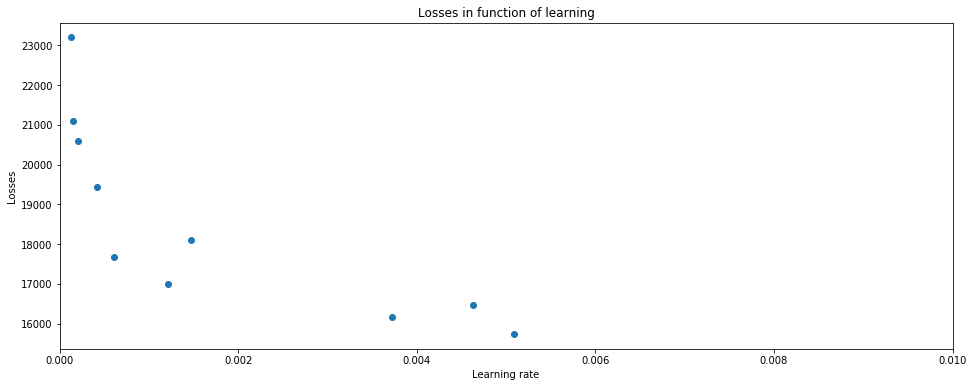

In [7]:
fig,ax = plt.subplots(figsize=(16, 6))
plt.scatter(learning_rates, losses)
plt.title("Losses in function of learning")
plt.xlabel("Learning rate")
plt.ylabel("Losses")
plt.xlim(0, 0.01);

In [8]:
y_pred = model.predict(X_test)

In [9]:
y_pred.shape

(2623, 14)

In [10]:
y_test.shape

(2623, 14)

In [11]:
y_pred[:,0]

array([221.57426, 236.04588, 239.47676, ..., 334.3022 , 337.55865,
       329.80664], dtype=float32)

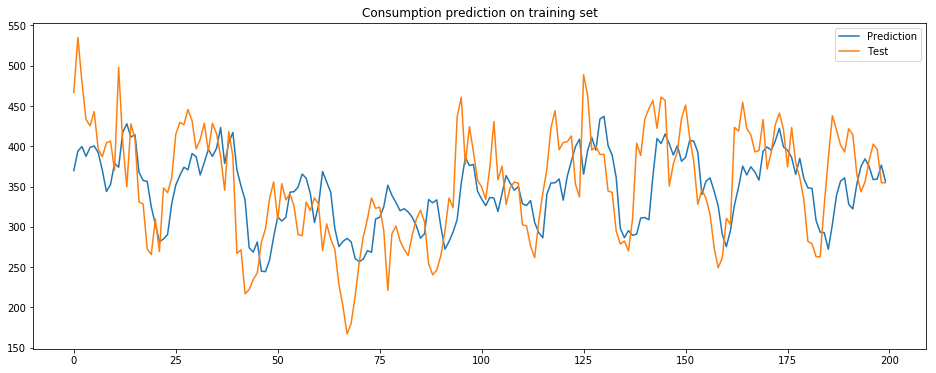

In [12]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(range(y_pred.shape[0]-2423), y_pred[:200, 10], label='Prediction')
plt.plot(range(y_test.shape[0]-2423), y_test[:200, 10], label='Test')
plt.title("Consumption prediction on training set")
plt.legend(loc='best');

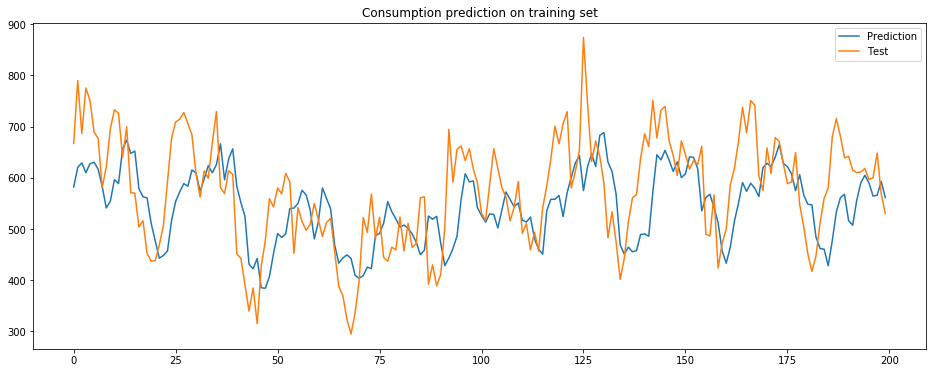

In [13]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(range(y_pred.shape[0]-2423), y_pred[:200, 12], label='Prediction')
plt.plot(range(y_test.shape[0]-2423), y_test[:200, 12], label='Test')
plt.title("Consumption prediction on training set")
plt.legend(loc='best');

In [14]:
score = model.evaluate(X_test, y_test, verbose=True)

2623/2623 [==============================] - 0s 115us/step


In [15]:
score

16174.534222130553

In [16]:
y_pred_train = model.predict(X_train)

In [17]:
y_pred_train.shape

(5323, 14)

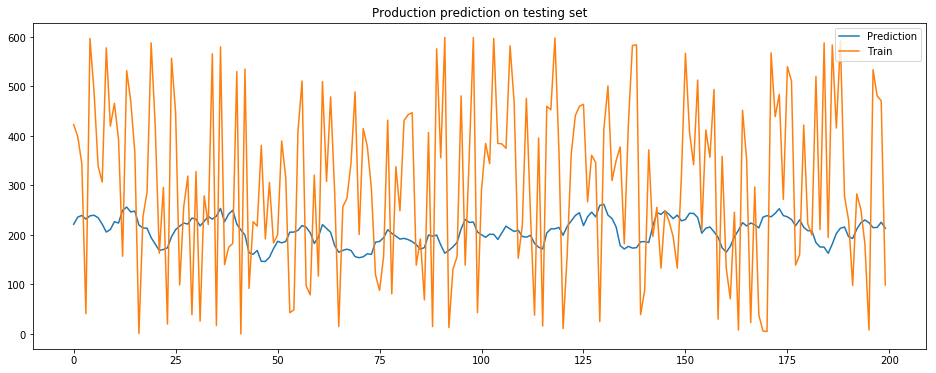

In [18]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(range(y_pred_train.shape[0]-5123), y_pred[:200, 0], label="Prediction")
plt.plot(range(y_train.shape[0]-5123), y_test[:200, 0], label="Train")
plt.title("Production prediction on testing set")
plt.legend(loc='best');

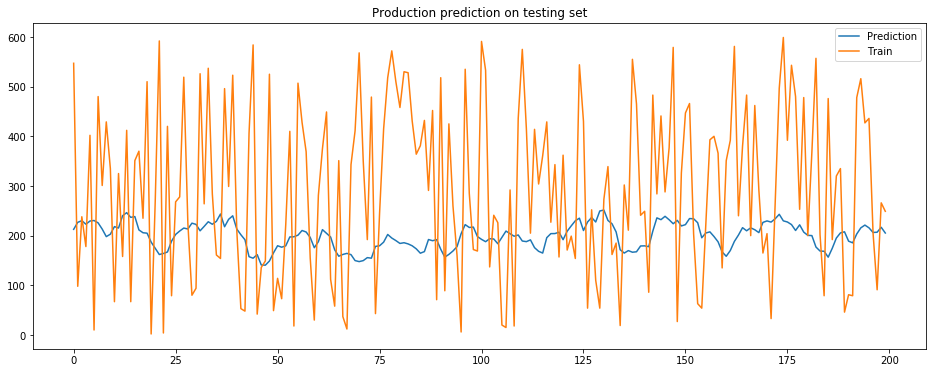

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(range(y_pred_train.shape[0]-5123), y_pred[:200, 1], label="Prediction")
plt.plot(range(y_train.shape[0]-5123), y_test[:200, 1], label="Train")
plt.title("Production prediction on testing set")
plt.legend(loc='best');

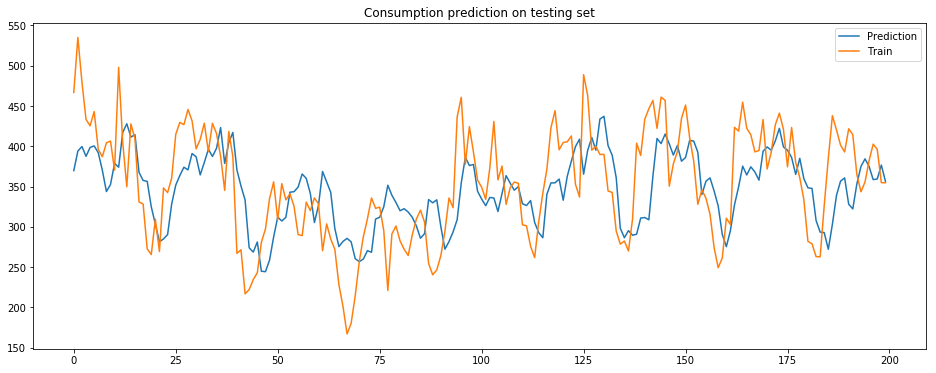

In [20]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(range(y_pred_train.shape[0]-5123), y_pred[:200, 10], label="Prediction")
plt.plot(range(y_train.shape[0]-5123), y_test[:200, 10], label="Train")
plt.title("Consumption prediction on testing set")
plt.legend(loc='best');

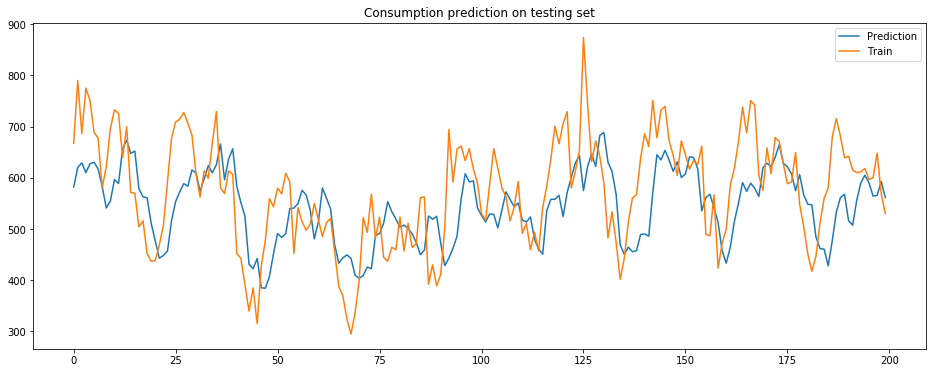

In [21]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(range(y_pred_train.shape[0]-5123), y_pred[:200, 12], label="Prediction")
plt.plot(range(y_train.shape[0]-5123), y_test[:200, 12], label="Train")
plt.title("Consumption prediction on testing set")
plt.legend(loc='best');

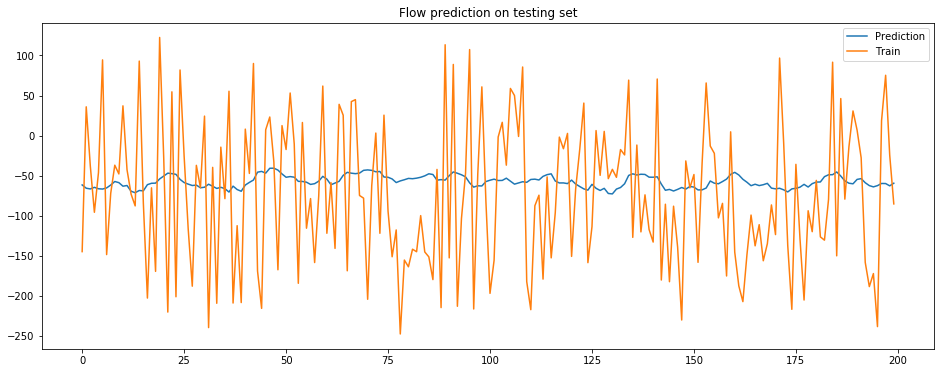

In [22]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(range(y_pred_train.shape[0]-5123), y_pred[:200, 4], label="Prediction")
plt.plot(range(y_train.shape[0]-5123), y_test[:200, 4], label="Train")
plt.title("Flow prediction on testing set")
plt.legend(loc='best');

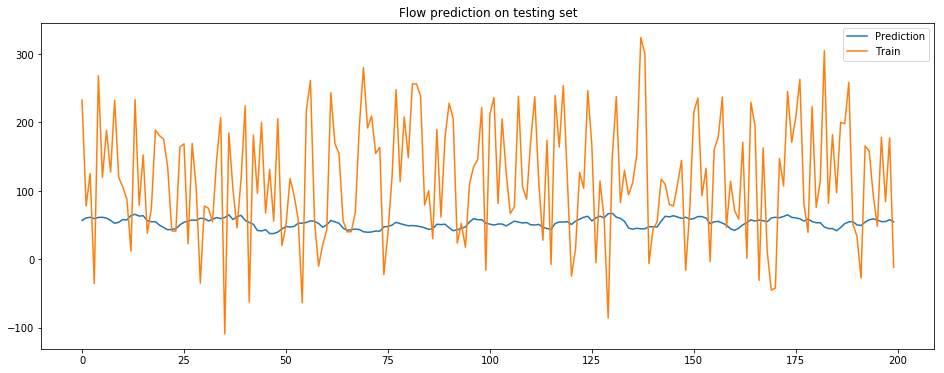

In [23]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(range(y_pred_train.shape[0]-5123), y_pred[:200, 6], label="Prediction")
plt.plot(range(y_train.shape[0]-5123), y_test[:200, 6], label="Train")
plt.title("Flow prediction on testing set")
plt.legend(loc='best');

In [24]:
X_train.shape[0]

5323

In [25]:
X_train_t = []
n_train = X_train.shape[0]
for i in range(n_train):
    X_train_t.append(X_train[i].transpose())
X_train_t = np.asarray(X_train_t)

In [26]:
X_test_t = []
n_test = X_test.shape[0]
for i in range(n_test):
    X_test_t.append(X_test[i].transpose())
X_test_t = np.asarray(X_test_t)

In [27]:
learning_rates = []
losses = []
accuracies = []
scores = []
for i in range(10):
    learning_rate = 10**np.random.uniform(-2, -4)
    model = Sequential()
    model.add(BatchNormalization(input_shape=(4, 14)))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(14, activation='linear'))
    model.compile(loss='mse',
                 optimizer=Adam(lr=learning_rate))
    history = model.fit(X_train_t, y_train, batch_size=32, epochs=num_epoch, verbose=0)
    losses.append(history.history['loss'][-1])
    learning_rates.append(learning_rate)

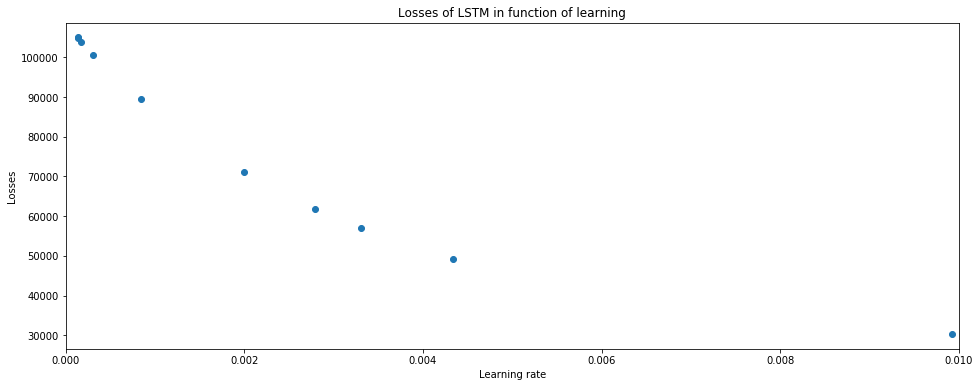

In [28]:
fig,ax = plt.subplots(figsize=(16, 6))
plt.scatter(learning_rates, losses)
plt.title("Losses of LSTM in function of learning")
plt.xlabel("Learning rate")
plt.ylabel("Losses")
plt.xlim(0, 0.01);

In [13]:
data

,generator1,generator2,generator3,generator4,5_6,5_8,5_9,6_7,7_8,external1,consumer1,8_9,consumer2,external2,convergence
0,382.0,322.0,408.826426,210.000000,-87.635310,346.287642,123.347668,234.364689,199.558243,-122.973952,566.606824,-222.939922,978.785808,-99.592253,[ True]
1,98.0,17.0,314.671134,203.185165,-17.943674,211.607173,-95.663499,-0.943673,230.494546,-479.710296,562.943212,-307.270653,952.557538,-402.934151,[ True]
2,595.0,106.0,353.078318,183.205081,60.367703,364.898755,169.733542,166.367703,138.163351,-82.433458,463.716127,-195.165189,881.432376,-25.431647,[ True]
3,123.0,569.0,322.981813,151.421356,-247.333848,277.712391,92.621458,321.666151,203.380132,-74.180268,515.448101,-185.090912,817.604791,-92.469455,[ True]
4,214.0,96.0,349.776355,110.000000,-32.787885,257.405013,-10.617128,63.212115,226.980806,-319.680575,505.688240,-268.022129,862.407949,-278.639256,[ True]
5,113.0,47.0,368.171791,61.763809,-40.782441,266.063440,-112.280998,6.217560,300.628236,-568.341577,642.102692,-378.344469,1006.799955,-490.625465,[ True]
6,224.0,111.0,433.221762,10.000000,-24.775355,359.682698,-110.907342,86.224646,298.233563,-753.853867,975.066714,-470.590033,1138.506296,-581.497374,[ True]
7,409.0,339.0,500.126559,10.000000,-99.462587,469.527018,38.935569,239.537414,329.452165,-492.795193,903.007001,-430.591474,1239.570659,-391.655905,[ True]
8,208.0,68.0,470.033524,10.000000,-47.634066,370.633613,-114.999546,20.365935,397.901800,-688.364025,780.861685,-485.633157,1264.168571,-600.632701,[ True]
9,451.0,2.0,506.760405,10.000000,43.276367,442.215422,-34.491788,45.276368,353.662717,-634.243486,832.617544,-476.707161,1282.585301,-511.198948,[ True]


In [12]:
np.mean(data['generator1'])

297.325786163522

In [9]:
np.mean(data['generator2'])

291.1874213836478

In [10]:
np.mean(data['generator3'])

269.5841837776822

In [11]:
np.mean(data['generator4'])

75.27301294054207